## Web Scraping
Used Honda Cars from Cars24.com Mumbai
This section documents the automated web scraping process to collect data on used Honda cars listed for sale in Mumbai from Cars24. The data will be used for analyzing car pricing trends, ownership patterns, and other market insights.

## Step 1 : WebDriver Setup and Page Loading

Launches the browser and opens the target page. The time.sleep() ensures all dynamic content loads before scraping begins.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Setup Chrome WebDriver
service = Service(executable_path="chromedriver.exe")
driver = webdriver.Chrome(service=service)

# Navigate to Cars24 Honda listings (Mumbai)
driver.get("https://www.cars24.com/buy-used-honda-cars-mumbai/")
time.sleep(10)  # Wait for the page to fully load


## Step 2: Dynamic Scrolling to Load All Listings
Many listings on Cars24 are loaded dynamically. This logic mimics scrolling behavior until all listings are fetched.


In [ ]:
# Scroll to load all listings (infinite scroll logic)
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    new_height = driver.execute_script("return document.body.scrollHeight")
    
    if new_height == last_height:
        break
    last_height = new_height


## Step 3: Extracting and Structuring Car Data
Extracts key data points from each listing, such as model year, car name, fuel type, ownership, and price. Exception handling ensures resilience even if some elements are missing

In [ ]:
# Locate car listing containers
cars = driver.find_elements(By.CLASS_NAME, "styles_contentWrap__9oSrl")

data = []

# Loop through each car element and extract relevant details
for car in cars:
    try:
        full_name = car.find_element(By.CLASS_NAME, "sc-braxZu").text.strip()
        model = full_name.split()[0]
        name = " ".join(full_name.split()[1:])
        
        p_tags = car.find_elements(By.TAG_NAME, "p")
        km = p_tags[0].text.strip() if len(p_tags) > 0 else "KM not found"
        fuel = p_tags[1].text.strip() if len(p_tags) > 1 else "Fuel not found"
        transmission = p_tags[2].text.strip() if len(p_tags) > 2 else "Transmission not found"
        owners = p_tags[3].text.strip() if len(p_tags) > 3 else "Owner info not found"

        price_tag = car.find_element(By.XPATH, ".//div[contains(@class, 'styles_priceWrap')]/p").text.strip()
        location_tag = car.find_element(By.CLASS_NAME, "styles_ellipsis__uatjG").text.strip()
        location = location_tag.split()[0]

        data.append({
            "Model": model,
            "Name": name,
            "KM Driven": km,
            "Fuel": fuel,
            "Transmission": transmission,
            "Owners": owners,
            "Price": price_tag,
            "Location": location
        })

    except Exception:
        continue

# Close the browser
driver.quit()

# Create DataFrame from extracted data
df = pd.DataFrame(data)  

# Save it to a CSV file
df.to_csv("Cars_Honda.csv", index=False)

# Step 4: Load Scraped Data from CSV
After saving the scraped Honda car listings into a CSV file, we now load that file into a Pandas DataFrame for further analysis and visualization.

In [ ]:

# Read the saved CSV file into a DataFrame
df = pd.read_csv("Cars_Honda.csv")

# Adjust the index to start from 1 instead of default 0
df.index = df.index + 1

# Display the DataFrame
df



,Model,Name,KM Driven,Fuel,Transmission,Owners,Price,Location
1,2014,Honda Brio,34.18k km,Petrol,Auto,1st owner,₹3.64 lakh,Mulund
2,2018,Honda City,40.19k km,Petrol,Manual,1st owner,₹5.98 lakh,Korum
3,2018,Honda WR-V,35.30k km,Petrol,Manual,1st owner,₹4.90 lakh,Goregaon
4,2017,Honda City,43.23k km,Petrol,Manual,2nd owner,₹5.78 lakh,Kandivali
5,2021,Honda Amaze,13.86k km,Petrol,Manual,1st owner,₹5.46 lakh,Regency
6,2020,Honda Jazz,31.38k km,Petrol,Auto,2nd owner,₹5.97 lakh,Kandivali
7,2018,Honda BR-V,69.40k km,Petrol,Manual,1st owner,₹6.15 lakh,Regency
8,2019,Honda Amaze,25.72k km,Petrol,Auto,2nd owner,₹5.25 lakh,Mulund
9,2018,Honda Amaze,43.44k km,Petrol,Auto,1st owner,₹4.26 lakh,Seawood
10,2021,Honda Jazz,25.62k km,Petrol,Auto,1st owner,₹6.27 lakh,Mulund


## Exploratory Data Analysis (EDA): Preparing the Used Car Dataset
This section explores the used Honda car dataset to understand its structure, check for missing values, and review key statistics. It also includes cleaning important columns like ‘KM Driven’, ‘Price’, and ‘Owners’ to ensure the data is accurate and ready for analysis.

## Step 5: Understand Dataset Structure, Quality & Numeric Distribution
This step helps assess the overall structure and quality of the dataset by checking data types, identifying missing values, and reviewing key statistical metrics. It ensures that the dataset is complete, consistent, and that numerical fields like price and kilometers driven are within expected ranges—laying a solid foundation for accurate analysis.

In [ ]:
# Check basic info and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         26 non-null     int64 
 1   Name          26 non-null     object
 2   KM Driven     26 non-null     object
 3   Fuel          26 non-null     object
 4   Transmission  26 non-null     object
 5   Owners        26 non-null     object
 6   Price         26 non-null     object
 7   Location      26 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.8+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

Model           0
Name            0
KM Driven       0
Fuel            0
Transmission    0
Owners          0
Price           0
Location        0
dtype: int64

In [ ]:
# Display all column names in the DataFrame
print(df.columns.tolist())

['Model', 'Name', 'KM Driven', 'Fuel', 'Transmission', 'Owners', 'Price', 'Location']


In [ ]:
# Clean 'KM Driven': remove text/symbols, handle 'k', and convert to numeric (e.g., 35k → 35000)
def clean_km(x):
    try:
        x = str(x).lower().replace('km', '').replace(' ', '').replace(',', '')
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
        else:
            return float(x)
    except:
        return None

df['KM_cleaned'] = df['KM Driven'].apply(clean_km)


In [ ]:
# Compare original and cleaned KM values
print(df[['KM Driven', 'KM_cleaned']].head())



   KM Driven  KM_cleaned
1  34.18k km     34180.0
2  40.19k km     40190.0
3  35.30k km     35300.0
4  43.23k km     43230.0
5  13.86k km     13860.0


In [42]:
# Clean and convert 'Price' from text to numeric rupees
def clean_price(x):
    try:
        x = str(x).lower().replace('â‚¹', '').replace('₹', '').replace('lakh', '').replace(',', '').strip()
        return float(x) * 100000
    except:
        return None

df['Price_cleaned'] = df['Price'].apply(clean_price)


In [43]:
# Compare original and cleaned Price values
print(df[['Price', 'Price_cleaned']].head())

        Price  Price_cleaned
1  ₹3.64 lakh       364000.0
2  ₹5.98 lakh       598000.0
3  ₹4.90 lakh       490000.0
4  ₹5.78 lakh       578000.0
5  ₹5.46 lakh       546000.0


In [39]:
# a function to convert 'Owner Type' to numerical values

def convert_owner(x):
    x = str(x).lower()
    if '1st' in x:
        return 1
    elif '2nd' in x:
        return 2
    elif '3rd' in x:
        return 3
    elif 'test' in x:
        return 0  # represents test drive vehicles
    else:
        return None  # unknown or irrelevant entries

df['Owner_cleaned'] = df['Owners'].apply(convert_owner)

In [40]:
# Compare original and cleaned Owners values
print(df[['Owners', 'Owner_cleaned']].head())

      Owners  Owner_cleaned
1  1st owner              1
2  1st owner              1
3  1st owner              1
4  2nd owner              2
5  1st owner              1


In [ ]:
# Display all column names in the DataFrame
print(df.columns.tolist())

['Model', 'Name', 'KM Driven', 'Fuel', 'Transmission', 'Owners', 'Price', 'Location', 'KM_cleaned', 'Price_cleaned', 'Owner_cleaned']


In [ ]:
# Drop original uncleaned columns and keep cleaned versions
df_cleaned = df.drop(['KM Driven', 'Price', 'Owners'], axis=1)

# Save cleaned DataFrame to new CSV
df_cleaned.to_csv("Honda_Cars_Cleaned.csv", index=False)


In [3]:
# Load and display the cleaned CSV to verify changes
import pandas as pd
df_new = pd.read_csv("Honda_Cars_Cleaned.csv")
df_new.head()


,Model,Name,Fuel,Transmission,Location,KM_cleaned,Price_cleaned,Owner_cleaned
0,2014,Honda Brio,Petrol,Auto,Mulund,34180.0,364000.0,1
1,2018,Honda City,Petrol,Manual,Korum,40190.0,598000.0,1
2,2018,Honda WR-V,Petrol,Manual,Goregaon,35300.0,490000.0,1
3,2017,Honda City,Petrol,Manual,Kandivali,43230.0,578000.0,2
4,2021,Honda Amaze,Petrol,Manual,Regency,13860.0,546000.0,1


## Visualization And Insights 
This section focuses on visual exploration of the cleaned dataset to uncover meaningful patterns and trends. Key charts and plots are generated to analyze factors like car prices, driven kilometers, and ownership distribution. These insights help understand the used car market dynamics in Mumbai for Honda vehicles and support informed decision-making.

## 1) Histogram Analysis – Car Price Frequency Distribution

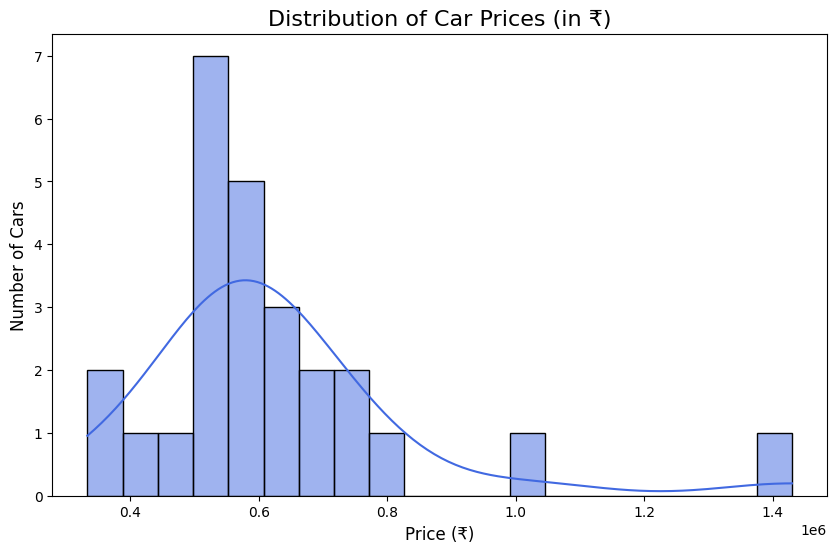

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the histogram for cleaned car prices
sns.histplot(df['Price_cleaned'], kde=True, bins=20, color='royalblue')

# Set plot title and labels
plt.title('Distribution of Car Prices (in ₹)', fontsize=16)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

# Display the plot
plt.show()


## 2) Box Plot Analysis – Car Price Distribution

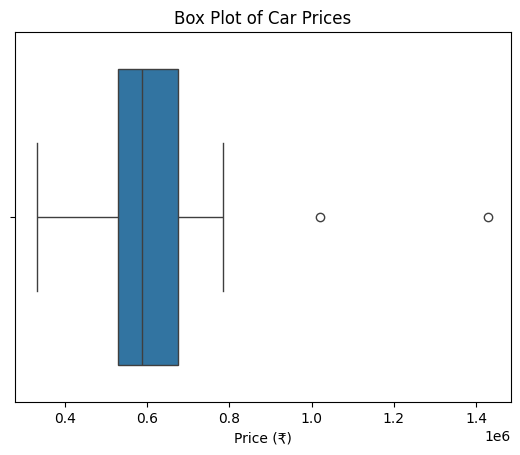

In [ ]:
sns.boxplot(x=df['Price_cleaned'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price (₹)')
plt.show()


## 3) KM Driven Histogram

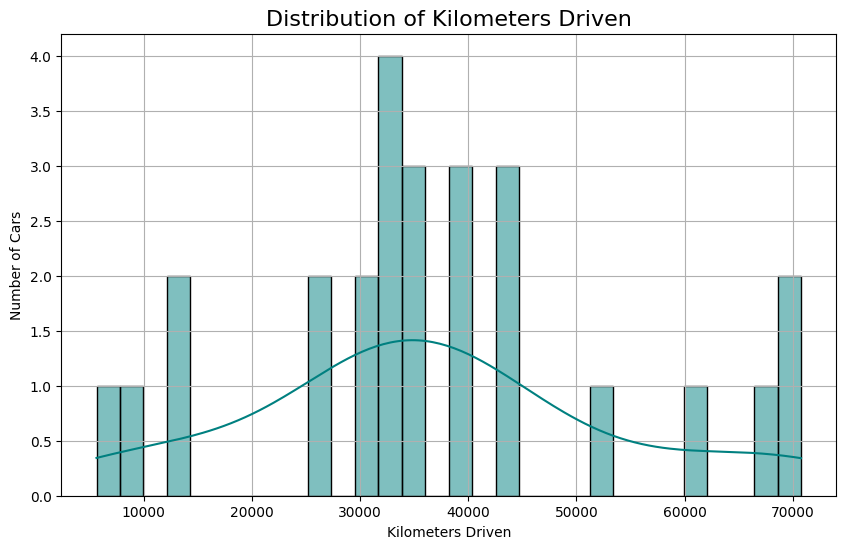

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['KM_cleaned'], bins=30, kde=True, color='teal')
plt.title("Distribution of Kilometers Driven", fontsize=16)
plt.xlabel("Kilometers Driven")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()


##4 KM Driven Box Plot

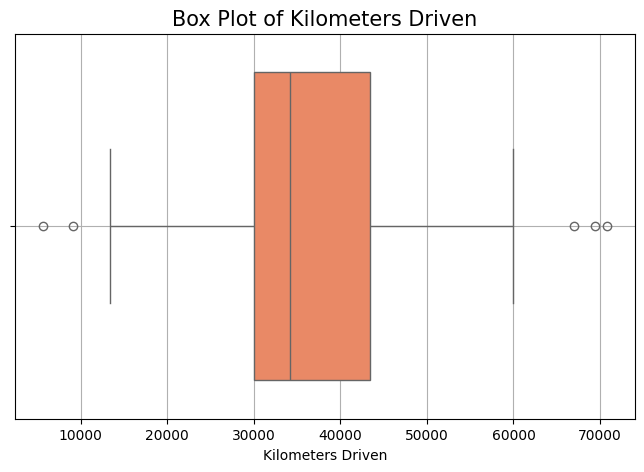

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['KM_cleaned'], color='coral')
plt.title("Box Plot of Kilometers Driven", fontsize=15)
plt.xlabel("Kilometers Driven")
plt.grid(True)
plt.show()



## 5) Average Price by Fuel Type (Bar Plot)

C:\Users\ANURAG SINGH\AppData\Local\Temp\ipykernel_11780\617992518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Fuel', y='Price_cleaned', estimator='mean', palette='Set2')


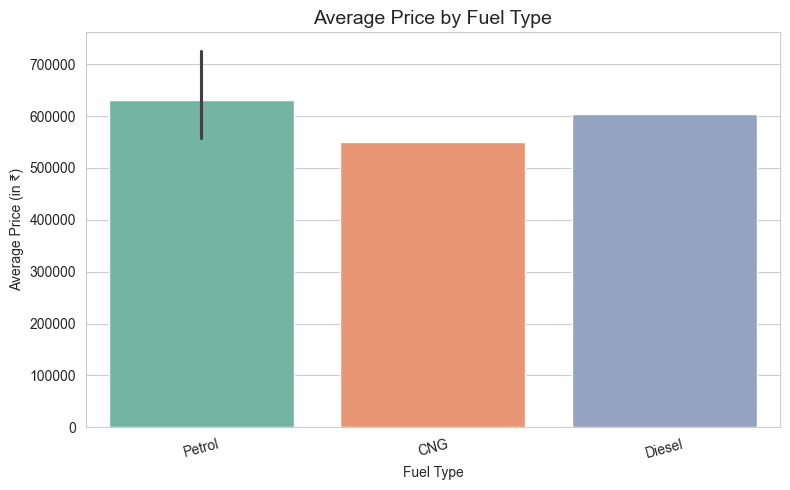

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and theme
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

# Barplot: Average price by fuel type
sns.barplot(data=df, x='Fuel', y='Price_cleaned', estimator='mean', palette='Set2')

# Title and labels
plt.title('Average Price by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in ₹)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## 6) Transmission Type Pie Chart (Manual/Automatic)

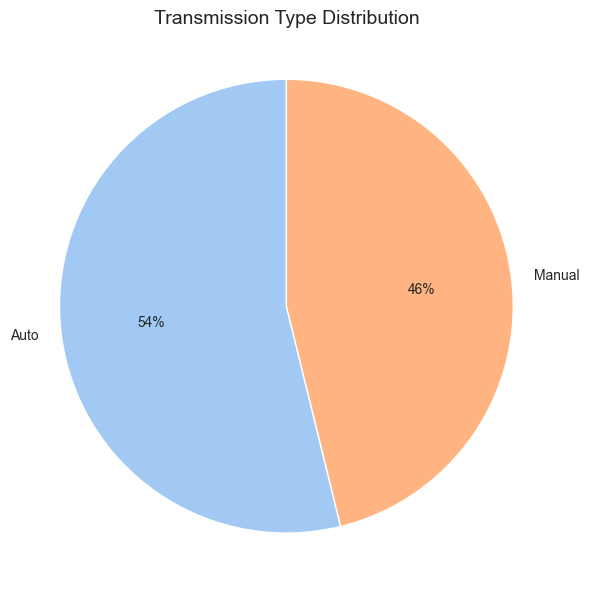

In [47]:
# Transmission distribution
transmission_counts = df['Transmission'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = sns.color_palette('pastel')[0:2]
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.0f%%', startangle=90, colors=colors)

# Title
plt.title('Transmission Type Distribution', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 7) Ownership Count (Bar Plot)

C:\Users\ANURAG SINGH\AppData\Local\Temp\ipykernel_11780\1714397885.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner_cleaned', palette='Set3', order=df['Owner_cleaned'].value_counts().index)


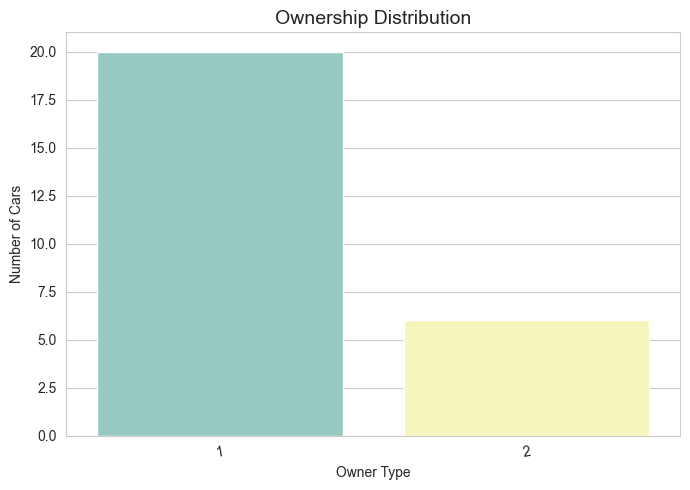

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and theme
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

# Bar plot for ownership distribution
sns.countplot(data=df, x='Owner_cleaned', palette='Set3', order=df['Owner_cleaned'].value_counts().index)

# Add title and axis labels
plt.title('Ownership Distribution', fontsize=14)
plt.xlabel('Owner Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


## 8) Top Locations by Car Count (Bar Plot)

C:\Users\ANURAG SINGH\AppData\Local\Temp\ipykernel_11780\14683916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


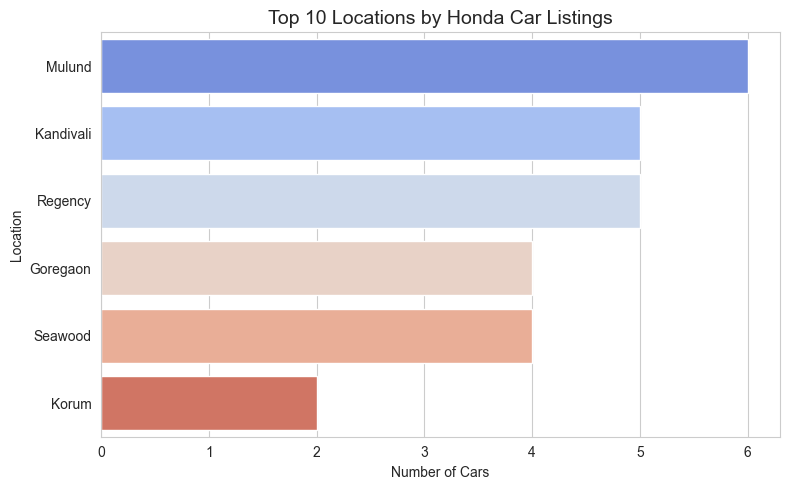

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Bar plot for top 10 locations by car count
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')

# Title and labels
plt.title('Top 10 Locations by Honda Car Listings', fontsize=14)
plt.xlabel('Number of Cars')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


## 9) Average Price by Location (Bar Plot)

C:\Users\ANURAG SINGH\AppData\Local\Temp\ipykernel_11780\992756201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='viridis')


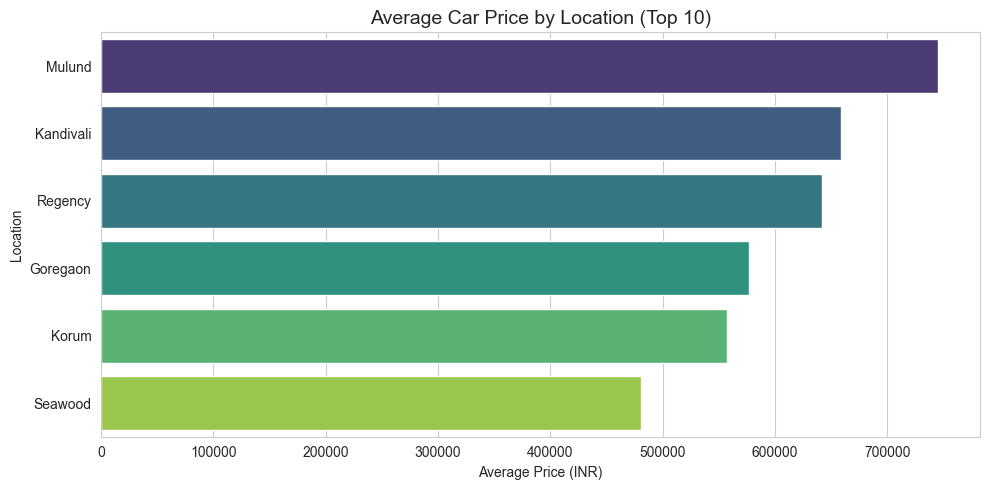

In [56]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

# Group by Location and calculate mean, sort by price
avg_price_location = df.groupby('Location')['Price_cleaned'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='viridis')

# Title and labels
plt.title('Average Car Price by Location (Top 10)', fontsize=14)
plt.xlabel('Average Price (INR)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


## 10) Scatter Plot: KM Driven vs Price

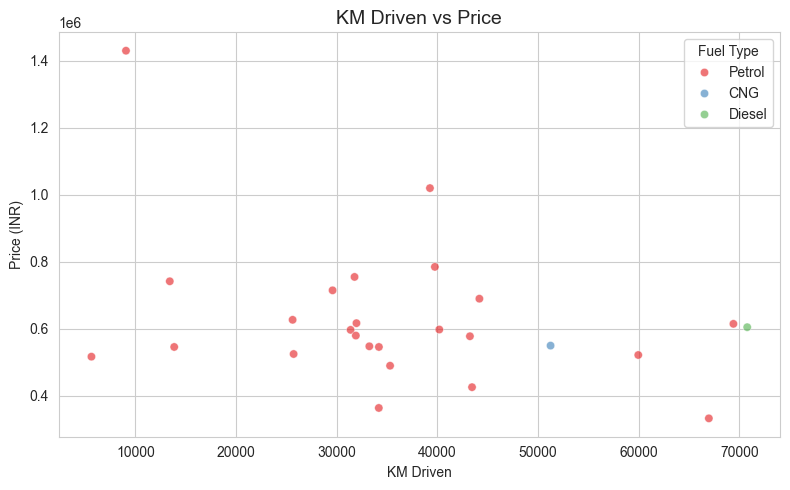

In [55]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Scatter plot for KM Driven vs Price
sns.scatterplot(data=df, x='KM_cleaned', y='Price_cleaned', hue='Fuel', alpha=0.6, palette='Set1')

# Title and labels
plt.title('KM Driven vs Price', fontsize=14)
plt.xlabel('KM Driven')
plt.ylabel('Price (INR)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


## 11) Line Chart: Average Price by Model Year

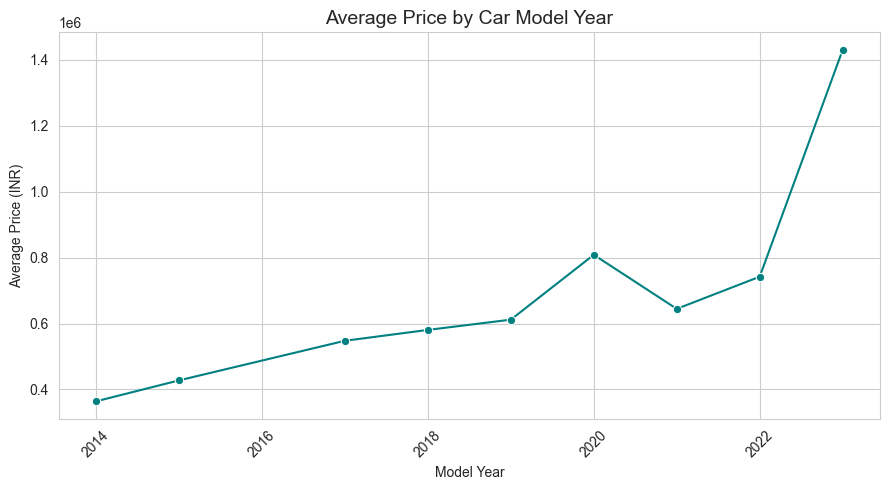

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and get average price
avg_price_year = df.groupby('Model')['Price_cleaned'].mean().sort_index()

# Plot
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values, marker='o', color='teal')

# Title and labels
plt.title('Average Price by Car Model Year', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 12) Bar Plot of Average Price by Honda Model

C:\Users\ANURAG SINGH\AppData\Local\Temp\ipykernel_27416\2328148258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=name_avg_price, x='Name', y='Price_cleaned', palette='coolwarm')


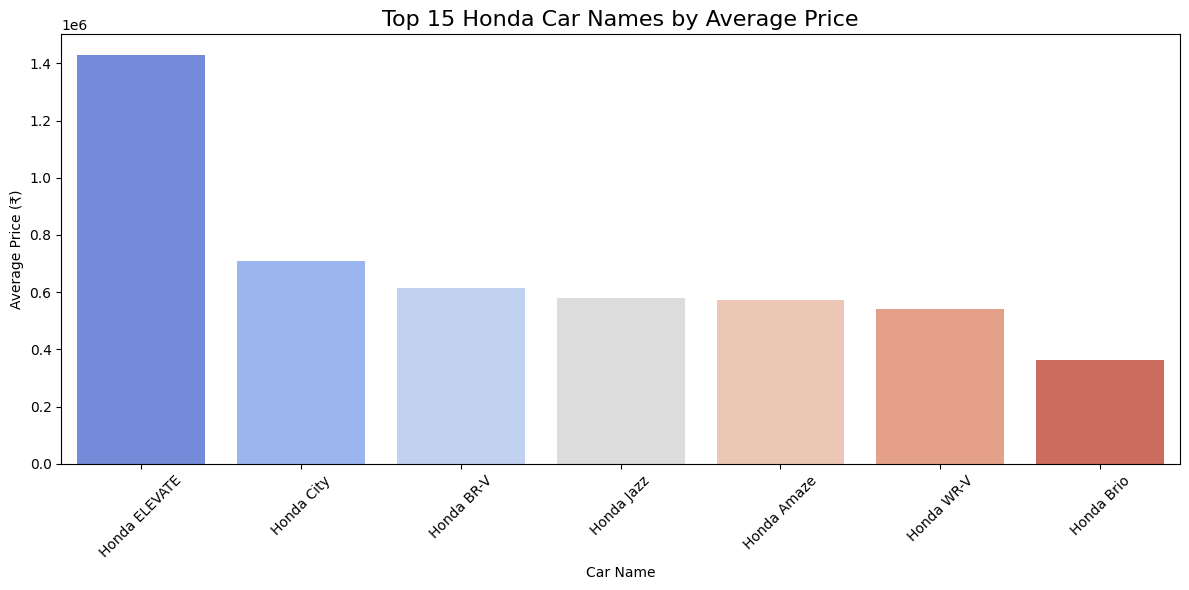

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and prepare data (Top 15 most frequent names)
name_avg_price = df_new.groupby('Name')['Price_cleaned'].mean().sort_values(ascending=False).head(15).reset_index()

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=name_avg_price, x='Name', y='Price_cleaned', palette='coolwarm')

# Step 3: Customize
plt.title('Top 15 Honda Car Names by Average Price', fontsize=16)
plt.xlabel('Car Name')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

